## Analysis of CHIA dataset

*Chia* ([[dataset](https://figshare.com/articles/dataset/Chia_Annotated_Datasets/11855817)][[paper](https://www.nature.com/articles/s41597-020-00620-0)]): A large annotated corpus for clinical trial elegibility criteria extracted from 1,000 interventional, Phase IV clinical trials registered in [ClinicalTrials.gov](http://ClinicalTrials.gov).

Description of the dataset:

- For each clinical trial (Example: NCT00050349) there are two **.txt** documents and two **.ann** documents, one for the inclusion criteria and one for the exclusion criteria.
- The two **.txt** documents (NCT00050349_exc.txt and NCT00050349_inc.txt) contain the correspondent free text for each inclusion or exclusion criteria respectively.
- The two **.ann** documents (NCT00050349_exc.ann and NCT00050349_inc.ann) contain the annotations for the entities and relationships in the correspondent **.txt** files. Each file has the following format:
    - Each line corresponds to a single entity or relationship. 
    - For entity lines we have: 'EntityID (Example: T1) EntityType (Example: Condition) StringStartIndes (Example: 28) StringEndIndex (Example: 35) Text (Example: metastatic carcinoid tumors)'
    - For relationship lines we have: 'RelationshipID (Example: R1) RelationshipType (Example: *has_value*) RootArgument (Example: T1) TargetArgument (Example: T2)'
    - In the case of *or* relationship we have the list of entities connected by the or.
    - List of available entities:
        1. Scope (deppending on the approach used)
	    2. Person
	    3. Condition
	    4. Drug
	    5. Observation
	    6. Measurement
	    7. Procedure
	    8. Device
	    9. Visit

We are going to analyze the corpus with scope entities.

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split

In [2]:
data_path = '../data/11855817/chia_with_scope'

In [3]:
# list of all files in the data path
files = os.listdir(data_path)

# filter out all files that are not .ann files
files = [f for f in files if f.endswith('.ann')]
print(len(files)) # 2000 (1000 for inclusion and 1000 for exclusion)

2000


In [4]:
# analyze the inclusion criteria files
inclusion_files = [f for f in files if f.endswith('inc.ann')]
print(len(inclusion_files)) # 1000

1000


In [5]:
dict_inc_crit = {'entity': {}, 'relation': {}, 'or': 0}
for f in inclusion_files:
    with open(os.path.join(data_path, f), 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('T'):
                term = line.strip().split('\t')[1].split()
                entity = term[0]
                if entity not in dict_inc_crit['entity']:
                    dict_inc_crit['entity'][entity] = 1
                else:
                    dict_inc_crit['entity'][entity] += 1
            elif line.startswith('R'):
                term = line.strip().split('\t')[1].split()
                relation = term[0]
                if relation not in dict_inc_crit['relation']:
                    dict_inc_crit['relation'][relation] = 1
                else:
                    dict_inc_crit['relation'][relation] += 1
            elif line.startswith('*'):
                dict_inc_crit['or'] += 1

In [6]:
# print the results for inclusion criteria
print('Inclusion criteria:')
print('Entities:')
for entity, count in dict_inc_crit['entity'].items():
    print(entity, count)
print('Relations:')
for relation, count in dict_inc_crit['relation'].items():
    print(relation, count)
print('Or:', dict_inc_crit['or'])

Inclusion criteria:
Entities:
Procedure 1594
Value 2450
Condition 2707
Negation 352
Qualifier 1446
Undefined_semantics 48
Temporal 973
Pregnancy_considerations 59
Post-eligibility 286
Person 1232
Measurement 1850
Multiplier 375
Scope 1295
Mood 235
Device 82
Parsing_Error 217
Not_a_criteria 34
Non-query-able 326
Reference_point 375
Visit 118
Observation 578
Informed_consent 189
Drug 759
Competing_trial 7
Non-representable 130
Grammar_Error 29
Subjective_judgement 57
Context_Error 39
Line 46
Relations:
Has_value 2220
AND 1010
Subsumes 624
Has_negation 354
Has_qualifier 999
Has_temporal 931
Has_multiplier 334
multi 191
Has_mood 220
Has_scope 546
Has_index 328
Has_context 80
causal 14
OR 6
Or: 1202


In [7]:
# analyze the exclusion criteria files
exclusion_files = [f for f in files if f.endswith('exc.ann')]
print(len(exclusion_files)) # 1000

1000


In [8]:
dict_exc_crit = {'entity': {}, 'relation': {}, 'or': 0}
for f in exclusion_files:
    with open(os.path.join(data_path, f), 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('T'):
                term = line.strip().split('\t')[1].split()
                entity = term[0]
                if entity not in dict_exc_crit['entity']:
                    dict_exc_crit['entity'][entity] = 1
                else:
                    dict_exc_crit['entity'][entity] += 1
            elif line.startswith('R'):
                term = line.strip().split('\t')[1].split()
                relation = term[0]
                if relation not in dict_exc_crit['relation']:
                    dict_exc_crit['relation'][relation] = 1
                else:
                    dict_exc_crit['relation'][relation] += 1
            elif line.startswith('*'):
                dict_exc_crit['or'] += 1

In [9]:
# print in a nice way
print('Exclusion criteria:')
print('Entities:')
for entity, count in dict_exc_crit['entity'].items():
    print(entity, count)
print('Relations:')
for relation, count in dict_exc_crit['relation'].items():
    print(relation, count)
print('Or:', dict_inc_crit['or'])

Exclusion criteria:
Entities:
Condition 9332
Mood 338
Multiplier 296
Measurement 1455
Temporal 2071
Procedure 2001
Drug 3042
Qualifier 2711
Person 434
Scope 2959
Observation 1217
Device 304
Negation 491
Parsing_Error 391
Undefined_semantics 217
Post-eligibility 199
Non-query-able 460
Value 1552
Reference_point 559
Pregnancy_considerations 131
Visit 47
Context_Error 104
Subjective_judgement 184
Not_a_criteria 42
Grammar_Error 53
Informed_consent 69
Non-representable 174
Competing_trial 89
Intoxication_considerations 5
Line 54
c-Requires_causality 1
Relations:
Has_mood 270
Has_multiplier 268
Has_temporal 2161
AND 1656
Has_qualifier 2041
Has_scope 967
Has_negation 475
multi 311
Has_context 100
Has_value 1423
Subsumes 1251
Has_index 501
causal 22
OR 1
Or: 1202


In [10]:
# combine the dictionaries
all_ent = set(list(dict_inc_crit['entity'].keys()) + list(dict_exc_crit['entity'].keys()))
all_rel = set(list(dict_inc_crit['relation'].keys()) + list(dict_exc_crit['relation'].keys()))
dict_all_crit = {'entity': {ent :  {'inc': 0 , 'exc': 0} for ent in all_ent}, 'relation': {rel : {'inc': 0 , 'exc': 0} for rel in all_rel}, 'or': 0}
for ent in all_ent:
    if ent in dict_inc_crit['entity']:
        dict_all_crit['entity'][ent]['inc'] = dict_inc_crit['entity'][ent]
    if ent in dict_exc_crit['entity']:
        dict_all_crit['entity'][ent]['exc'] = dict_exc_crit['entity'][ent]
for rel in all_rel:
    if rel in dict_inc_crit['relation']:
        dict_all_crit['relation'][rel]['inc'] = dict_inc_crit['relation'][rel]
    if rel in dict_exc_crit['relation']:
        dict_all_crit['relation'][rel]['exc'] = dict_exc_crit['relation'][rel]
dict_all_crit['or'] = {'inc': dict_inc_crit['or'], 'exc': dict_exc_crit['or']}

In [13]:
entities_df = pd.DataFrame.from_dict(dict_all_crit['entity'], orient='index')
entities_df['total'] = entities_df['inc'] + entities_df['exc']
entities_df.sort_values(by=['total'], ascending=False, inplace=True)
entities_df.head(15)

,inc,exc,total
Condition,2707,9332,12039
Scope,1295,2959,4254
Qualifier,1446,2711,4157
Value,2450,1552,4002
Drug,759,3042,3801
Procedure,1594,2001,3595
Measurement,1850,1455,3305
Temporal,973,2071,3044
Observation,578,1217,1795
Person,1232,434,1666


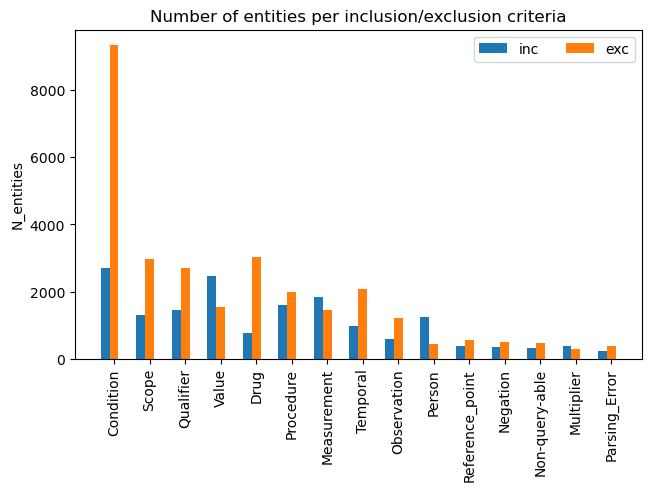

In [17]:
# plot the entities
x = np.arange(15)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for l in ['inc', 'exc']:
    offset = width * multiplier
    v = entities_df[l][:15]
    rects = ax.bar(x + offset, v, width, label=l)
    multiplier += 1

ax.set_ylabel('N_entities')
ax.set_title('Number of entities per inclusion/exclusion criteria')
ax.set_xticks(x + width, entities_df.index[:15])
ax.legend(loc='upper right', ncols=2)

plt.xticks(rotation=90)

plt.show()

In [18]:
# now analyze the relations
relations_df = pd.DataFrame.from_dict(dict_all_crit['relation'], orient='index')
relations_df['total'] = relations_df['inc'] + relations_df['exc']
relations_df.sort_values(by=['total'], ascending=False, inplace=True)
relations_df.head(15)

,inc,exc,total
Has_value,2220,1423,3643
Has_temporal,931,2161,3092
Has_qualifier,999,2041,3040
AND,1010,1656,2666
Subsumes,624,1251,1875
Has_scope,546,967,1513
Has_negation,354,475,829
Has_index,328,501,829
Has_multiplier,334,268,602
multi,191,311,502


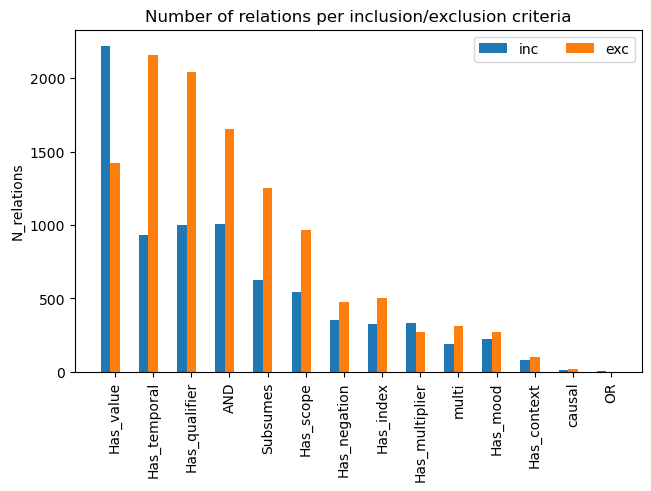

In [19]:
# plot the relations
x = np.arange(len(relations_df.index))
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for l in ['inc', 'exc']:
    offset = width * multiplier
    v = relations_df[l]
    rects = ax.bar(x + offset, v, width, label=l)
    multiplier += 1

ax.set_ylabel('N_relations')
ax.set_title('Number of relations per inclusion/exclusion criteria')
ax.set_xticks(x + width, relations_df.index)
ax.legend(loc='upper right', ncols=2)

plt.xticks(rotation=90)
plt.show()

### Dataset Analysis without considering overlapping erntities

Until now we have considered all annotated entities, considering all overlapping cases. Now, taking into account that in the paper we are using as baseline, they do not consider overlapping entities, we are going to remover all those cases. Furthermore, we are going to focus on the more represented entities, as they do in the paper

In [20]:
selected_entities = ['Condition', 'Value', 'Drug', 'Procedure', 'Measurement', 'Temporal', \
    'Observation', 'Person', 'Mood', 'Device', 'Pregnancy_considerations']

In [21]:
# read individual trials to be able to split the data into train, dev and test
files = os.listdir(data_path)
individual_trials = set([f.split('.')[0].split('_')[0] for f in files if f.endswith('.ann')])
print(len(individual_trials)) # 1000

1000


In [22]:
# paths to BART chia data splited into train, val and test
train_path = '../data/chia_bart/train/'
val_path = '../data/chia_bart/val/'
test_path = '../data/chia_bart/test/'

# paths to BIO chia data splited into train, val and test
train_path_bio = '../data/chia_bio/train/'
val_path_bio = '../data/chia_bio/val/'
test_path_bio = '../data/chia_bio/test/'

In [25]:
# split the data into train, val and test
train_trials, val_trials = train_test_split(list(individual_trials), test_size=0.2, random_state=13, shuffle=True)
val_trials, test_trials = train_test_split(val_trials, test_size=0.5, random_state=13, shuffle=True)
print(len(train_trials), len(val_trials), len(test_trials)) # 800, 100, 100
chia_datasets = {"train":train_trials, "val":val_trials, "test":test_trials}
json.dump(chia_datasets, open("../data/chia_datasets.json", "w+", encoding="utf-8"))

800 100 100


In [34]:
def filter_valid_entities(entities, selected_entities):
    """
    This function recive a list of tuples of entities in the format (entity, startIndex, endIndex)
    and returns a list with valid entities
    - valid entities are entities that are not overlapping with other entities and 
    are among the selected entities
    :params 
        entities: list of tuples of entities in the format (entity, startIndex, endIndex)
        selected_entities: list of entities that are selected for the task
    :return: list of selected entities
    """

    entities_conflict = {key: {key_: 0 for key_ in selected_entities} for key in selected_entities}
    current_entities = []
    entities.sort(key = lambda x: (x[1], x[2])) # sort the entities by the start index
    last_index_valid = 0
    last_valid = None
    for i in range(len(entities)):
        if last_valid is None and entities[i][0] in selected_entities:
            last_valid = entities[i]
            current_entities.append(entities[i])
            last_index_valid = i
            continue
        if entities[i][0] not in selected_entities:
            continue
        if entities[i][1] < last_valid[2]:
            entities_conflict[entities[i][0]][last_valid[0]] += 1
            entities_conflict[last_valid[0]][entities[i][0]] += 1
            if entities[i][2] - entities[i][1] > last_valid[2] - last_valid[1]:
                last_valid = entities[i]
                current_entities[-1] = entities[i]
                last_index_valid = i
        elif entities[i][1] == last_valid[2]:
            entities_conflict[entities[i][0]][last_valid[0]] += 1
            entities_conflict[last_valid[0]][entities[i][0]] += 1
            new_entity = (last_valid[0], last_valid[1], entities[i][2])
            current_entities[-1] = new_entity
            last_valid = new_entity
            last_index_valid = i
        else:
            last_valid = entities[i]
            current_entities.append(entities[i])
            last_index_valid = i

            
           
    return current_entities, entities_conflict

def save_selected_entities(trials_names, selected_entities, data_path, save_path):
    """
    This function receives a list of trials names, a list of selected entities and the path to the data
    and saves the data with only the selected entities in the save path
    :params
        trials_names: list of trials names
        selected_entities: list of selected entities
        data_path: path to the data
        save_path: path to save the data
    """
    dict_selected_entities = {ent: 0 for ent in selected_entities}
    entities_conflicts = {key: {key_ : 0 for key_ in selected_entities} for key in selected_entities}
    for trial in trials_names:
        for crit in {'inc', 'exc'}:
            with open(os.path.join(data_path, trial + '_' + crit + '.ann'), 'r', encoding='utf-8') as f:
                lines = f.readlines()
            with open(os.path.join(data_path, trial + '_' + crit + '.txt'), 'r', encoding='utf-8') as f:
                text = f.readlines()
                if trial in ['NCT02348918_exc', 'NCT02348918_inc', 'NCT01735955_exc']:
                    text = ' '.join([i.strip() for i in text])
                else:
                    text = '  '.join([i.strip() for i in text])
            entities = []
            complete_entities = []
            # print(trial + '_' + crit)

            for line in lines:
                if line.startswith('T'):
                    term = line.strip().split('\t')[1].split()
                    entity = term[0]
                    start = int(term[1])
                    if not term[2].isdigit():
                        continue
                    end = int(term[2])
                    if end <= start:
                        continue
                    entities.append((entity, start, end))
            current_entities, conflicts = filter_valid_entities(entities, selected_entities)
            for key, value in conflicts.items():
                for key_, value_ in value.items():
                    entities_conflicts[key][key_] += value_
            for ent in current_entities:
                dict_selected_entities[ent[0]] += 1
                complete_entities.append(ent[0] + ' ' + str(ent[1]) + ' ' + str(ent[2]) + '\t' + text[ent[1]:ent[2]])
            with open(os.path.join(save_path, trial + '_' + crit + '.ann'), 'w+', encoding='utf-8') as f:
                for i in range(len(complete_entities)):
                    f.write('T' + str(i) + '\t' + complete_entities[i] + '\n')
            with open(os.path.join(save_path, trial + '_' + crit + '.txt'), 'w+', encoding='utf-8') as f:
                f.write(text)
    return dict_selected_entities, entities_conflicts

# save the selected entities for train, val and test
dict_entites_train, conflicts_train = save_selected_entities(train_trials, selected_entities, data_path, train_path)
dict_entities_val , conflicts_val = save_selected_entities(val_trials, selected_entities, data_path, val_path)
dict_entities_test, conflicts_test = save_selected_entities(test_trials, selected_entities, data_path, test_path)

In [51]:
# plot a heatmap with the conflicts
conflicts_dict = {key: {key_: 0 for key_ in selected_entities} for key in selected_entities}
for conf_dic in [conflicts_train, conflicts_val, conflicts_test]:
    for key, value in conf_dic.items():
        for key_, value_ in value.items():
            conflicts_dict[key][key_] += value_
conflicts_df = pd.DataFrame.from_dict(conflicts_dict)
conflicts_df

,Condition,Value,Drug,Procedure,Measurement,Temporal,Observation,Person,Mood,Device,Pregnancy_considerations
Condition,56,33,35,67,45,21,6,1,1,1,17
Value,33,8,7,1,147,4,7,77,0,0,3
Drug,35,7,20,39,1,44,9,0,0,0,0
Procedure,67,1,39,14,3,132,14,0,3,8,6
Measurement,45,147,1,3,12,3,3,0,0,0,2
Temporal,21,4,44,132,3,26,3,1,2,3,2
Observation,6,7,9,14,3,3,8,2,2,2,1
Person,1,77,0,0,0,1,2,4,0,0,10
Mood,1,0,0,3,0,2,2,0,4,0,1
Device,1,0,0,8,0,3,2,0,0,0,0


In [60]:
conf_m = conflicts_df.to_numpy()

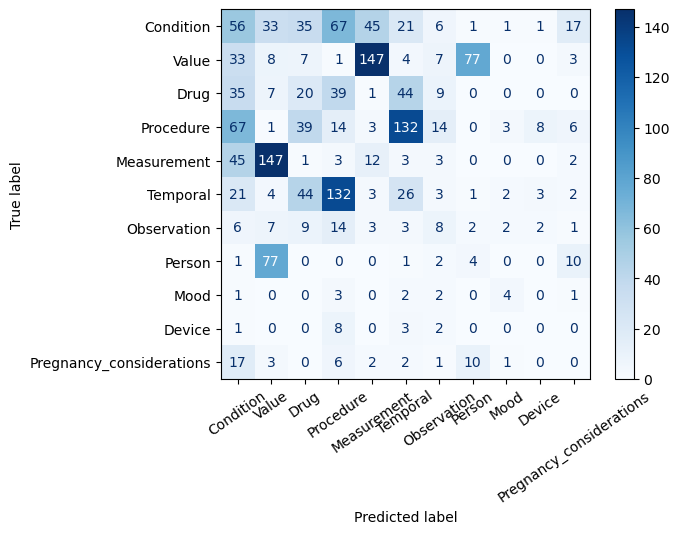

In [61]:
# import confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=selected_entities)
disp.plot(cmap="Blues")
plt.xticks(rotation=35)
plt.show()

In [71]:
entities_df = pd.DataFrame(columns=['train', 'val', 'test'])
entities_df['train'] = dict_entites_train.values()
entities_df['val'] = dict_entities_val.values()
entities_df['test'] = dict_entities_test.values()
entities_df['total'] = entities_df['train'] + entities_df['val'] + entities_df['test']
entities_df['conflicts_train'] = [sum(conf.values()) for conf in conflicts_train.values()]
entities_df['conflicts_val'] = [sum(conf.values()) for conf in conflicts_val.values()]
entities_df['conflicts_test'] = [sum(conf.values()) for conf in conflicts_test.values()]
entities_df['rate_conflicts'] = (entities_df['conflicts_train'] + entities_df['conflicts_val'] + entities_df['conflicts_test']) / entities_df['total']
entities_df.index = dict_entites_train.keys()
entities_df.sort_values(by=['train'], ascending=False, inplace=True)
entities_df

,train,val,test,total,conflicts_train,conflicts_val,conflicts_test,rate_conflicts
Condition,8765,1159,1119,11043,233,17,33,0.025627
Drug,2915,357,304,3576,136,13,6,0.043345
Value,2910,404,337,3651,239,20,28,0.078609
Procedure,2524,380,305,3209,249,20,18,0.089436
Measurement,2501,363,273,3137,176,18,22,0.068856
Temporal,2343,344,281,2968,206,17,18,0.081199
Observation,1389,138,139,1666,41,6,10,0.034214
Person,1262,165,165,1592,80,8,7,0.059673
Mood,424,70,68,562,6,5,2,0.023132
Device,278,26,41,345,11,1,2,0.040580


In [198]:
entities_paper_df = pd.DataFrame(columns=['train', 'val', 'test'])
entities_paper_df['train'] = [8927, 2990,2892,2602,2532,2456,1381,1239,467,275,160]
entities_paper_df['val'] = [1057,373,345,282,316,247,127,152,47,35,12]
entities_paper_df['test'] = [1098, 327, 311, 320, 280, 266, 180, 140, 49,41, 18]
entities_paper_df['total'] = entities_paper_df['train'] + entities_paper_df['val'] + entities_paper_df['test']
entities_paper_df.index = ['Condition', 'Value', 'Drug', 'Procedure', 'Measurement', 'Temporal', \
    'Observation', 'Person', 'Mood', 'Device', 'Pregnancy_considerations']
entities_paper_df

,train,val,test,total
Condition,8927,1057,1098,11082
Value,2990,373,327,3690
Drug,2892,345,311,3548
Procedure,2602,282,320,3204
Measurement,2532,316,280,3128
Temporal,2456,247,266,2969
Observation,1381,127,180,1688
Person,1239,152,140,1531
Mood,467,47,49,563
Device,275,35,41,351


In [210]:
entities_df['paper_train'] = entities_paper_df['train']
entities_df['paper_val'] = entities_paper_df['val']
entities_df['paper_test'] = entities_paper_df['test']
entities_df['paper_total'] = entities_paper_df['total']
entities_df['diff_total'] = entities_df['total'] - entities_df['paper_total']
entities_df

,train,val,test,total,paper_train,paper_val,paper_test,paper_total,diff_total
Condition,9171,915,957,11043,8927,1057,1098,11082,-39
Value,2975,359,317,3651,2990,373,327,3690,-39
Drug,2889,332,355,3576,2892,345,311,3548,28
Procedure,2620,314,275,3209,2602,282,320,3204,5
Measurement,2545,296,296,3137,2532,316,280,3128,9
Temporal,2466,269,233,2968,2456,247,266,2969,-1
Observation,1393,142,131,1666,1381,127,180,1688,-22
Person,1294,154,144,1592,1239,152,140,1531,61
Mood,480,45,37,562,467,47,49,563,-1
Device,280,36,29,345,275,35,41,351,-6


In [211]:
# compare total amount of entities
sum(entities_df['total']), sum(entities_df['paper_total']), sum(entities_df['diff_total'])

(31939, 31944, -5)

## Let's check now the distribution of the number of tokens per criteria using BERT tokenizer (using data in BIO format)

In [72]:
# import bert tokenizer
from transformers import AutoTokenizer

bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/Users/javierlopetegui/miniforge3/envs/TER/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [79]:
# read the data in data/chia/chia_bio
data_bio_path = '../data/chia/chia_bio'

files = os.listdir(data_bio_path)

criteria_list = []

for f in files:
    if f.endswith('.txt'):
        with open(os.path.join(data_bio_path, f), 'r', encoding='utf-8') as file:
            text = file.read()
            text = text.split('\n\n')
            text = [t for t in text if t != '']
            text = [t.split('\n') for t in text]
            
            crit_list = [' '.join([words.split()[0] for words in t if words != '']) for t in text]
            # for crit in crit_list:
            #     if len(crit.split()) == 1:
            #         print(f)
            #         break
            criteria_list.extend(crit_list)
            # tokens = tokenizer.tokenize(text)
            # tokens_list.append(tokens)
criteria_list = [c for c in criteria_list if c != '']

In [80]:
space_tokenizer_count = [len(c.split()) for c in criteria_list]
print(f"Using a simple space split tokenizer:\n total number of tokens: {sum(space_tokenizer_count)}\n Mean: {sum(space_tokenizer_count)/len(space_tokenizer_count)}\n Max: {max(space_tokenizer_count)}\n Min: {min(space_tokenizer_count)}")

Using a simple space split tokenizer:
 total number of tokens: 179778
 Mean: 14.487710532677895
 Max: 419
 Min: 1


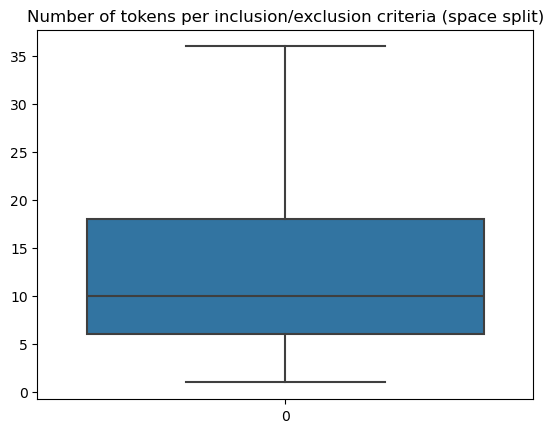

In [86]:
# boxplot of the number of tokens
sns.boxplot(space_tokenizer_count, showfliers=False)
plt.title('Number of tokens per inclusion/exclusion criteria (space split)')
plt.show()

In [84]:
bert_tokenizer_count = [len(bert_tokenizer.tokenize(c)) for c in criteria_list]
print(f"Using BERT tokenizer:\n total number of tokens: {sum(bert_tokenizer_count)}\n Mean: {sum(bert_tokenizer_count)/len(bert_tokenizer_count)}\n Max: {max(bert_tokenizer_count)}\n Min: {min(bert_tokenizer_count)}")

Using BERT tokenizer:
 total number of tokens: 231298
 Mean: 18.639535820775244
 Max: 505
 Min: 1


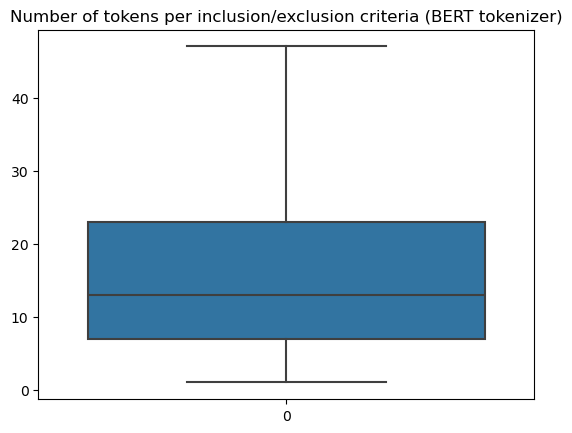

In [87]:
sns.boxplot(bert_tokenizer_count, showfliers=False)
plt.title('Number of tokens per inclusion/exclusion criteria (BERT tokenizer)')
plt.show()

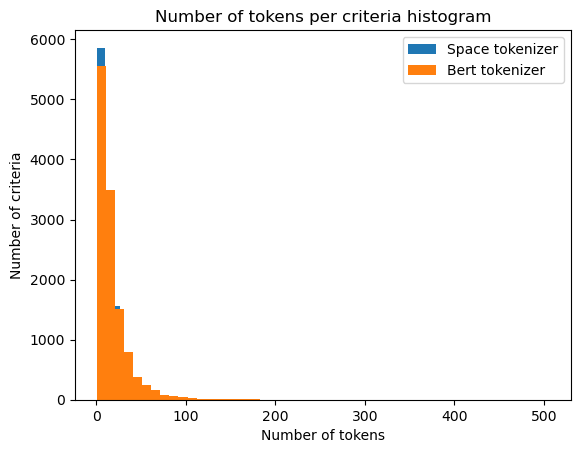

In [38]:
plt.hist(space_tokenizer_count, bins=50, label='Space tokenizer')
plt.hist(bert_tokenizer_count, bins=50, label='Bert tokenizer')
plt.xlabel('Number of tokens')
plt.ylabel('Number of criteria')
plt.title('Number of tokens per criteria histogram')
plt.legend()
plt.show()

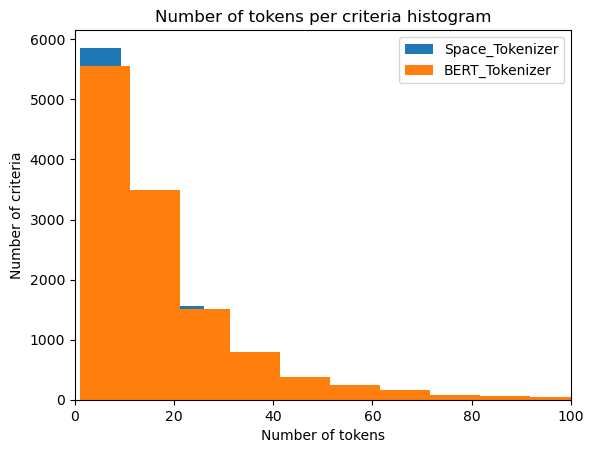

In [40]:
plt.hist(space_tokenizer_count, bins=50, label = 'Space_Tokenizer')
plt.hist(bert_tokenizer_count, bins=50 , label = 'BERT_Tokenizer')
plt.xlabel('Number of tokens')
plt.ylabel('Number of criteria')
plt.title('Number of tokens per criteria histogram')
plt.xlim(0, 100)
plt.legend()
plt.show()